In [ ]:
import pandas as pd
import json
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Project_Dissertation/Data"


In [ ]:
df = pd.read_csv(path + "/Mutual_Funds/Top_Equities_UK.csv").set_index("SecId")
analyzer = SentimentIntensityAnalyzer()

In [ ]:
#F00000OPY7 # F00000WRZM
select_company = "F00000OPY7"

In [ ]:
companyNameList = []
tickerFileList = []
companyNameList.append(df.loc[select_company,'company_1'])
companyNameList.append(df.loc[select_company,'company_2'])
companyNameList.append(df.loc[select_company,'company_3'])
print(companyNameList)

['Legal & General Group PLC', 'Aviva PLC', 'Imperial Brands PLC']


In [ ]:
with open(path + "/MutualFunds_TickerData/Company_Ticker_Map.json","r") as f:
    company_ticker_map_dict = json.load(f)


for co in companyNameList:
  if company_ticker_map_dict[co] != "NONE":
    tickerFileList.append(company_ticker_map_dict[co] + ".json")
  else:
    companyNameList.remove(co)

print(tickerFileList)

['LGEN.json', 'AV.json', 'IMB.json']


In [ ]:
tickerList=[]
newsList=[]
companyList=[]

In [ ]:
for i,fname in enumerate(tickerFileList):
    with open(path+"/MutualFunds_TickerData/" + fname,"r") as f:
        file = json.load(f)    
    news_headlines =  file["News"]
    for news in news_headlines:
        tickerList.append(fname.split(".")[0])
        newsList.append(news)
        companyList.append(companyNameList[i])

In [ ]:
news_data_dict = { "Company" : companyList,"Ticker" : tickerList, "Headlines":newsList }
news_df = pd.DataFrame(news_data_dict)
news_df

,Company,Ticker,Headlines
0,Legal & General Group PLC,LGEN,Legal & General Group Plc 1H Operating Profit ...
1,Legal & General Group PLC,LGEN,Legal & General to Vote Against Cineworld Chai...
2,Legal & General Group PLC,LGEN,Legal & General annuity assets rise 19%
3,Aviva PLC,AV,Activist Investor Cevian Capital Increases Avi...
4,Aviva PLC,AV,Activist Investor Cevian Capital Increases Avi...
5,Aviva PLC,AV,Aviva PLC 1H Loss/Shr 6.2p
6,Aviva PLC,AV,"Aviva, Persimmon Commit to Leasehold Changes i..."
7,Aviva PLC,AV,Aviva shares shoot up as activist investor Cev...
8,Aviva PLC,AV,Activist Investor Cevian Capital Now Holds 4.9...
9,Aviva PLC,AV,Cevian Capital Holds 4.95% Shareholding in Aviva


In [ ]:
scores = news_df['Headlines'].apply(analyzer.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)
scores_df

,neg,neu,pos,compound
0,0.000,0.645,0.355,0.5267
1,0.000,0.857,0.143,0.1280
2,0.000,0.610,0.390,0.2960
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000
5,0.000,1.000,0.000,0.0000
6,0.000,0.820,0.180,0.2960
7,0.136,0.739,0.125,-0.0516
8,0.000,1.000,0.000,0.0000
9,0.000,1.000,0.000,0.0000


In [ ]:
news_df = news_df.join(scores_df,how='right')

In [ ]:
news_df['Sentiment'] = news_df['compound'].apply(lambda score: "Postive" if score > 0 else "Negative")
sentiments_df = news_df.groupby(['Company','Ticker','Sentiment'])[['Headlines']].count().reset_index()
sentiments_df

,Company,Ticker,Sentiment,Headlines
0,Aviva PLC,AV,Negative,13
1,Aviva PLC,AV,Postive,3
2,Imperial Brands PLC,IMB,Negative,4
3,Imperial Brands PLC,IMB,Postive,3
4,Legal & General Group PLC,LGEN,Postive,3


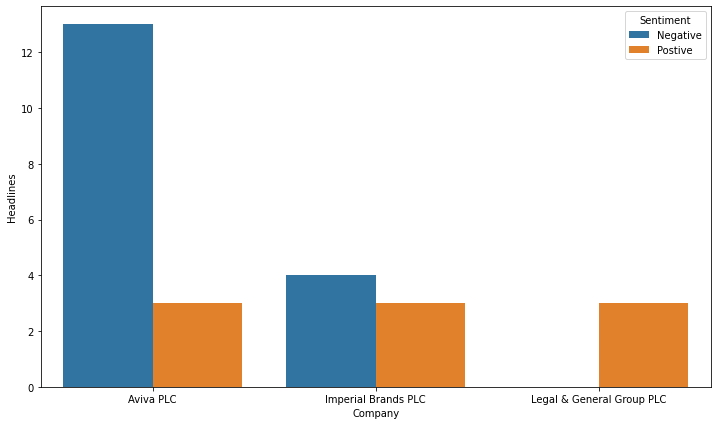

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.barplot(x=sentiments_df.Company, y= sentiments_df.Headlines, hue = sentiments_df.Sentiment)

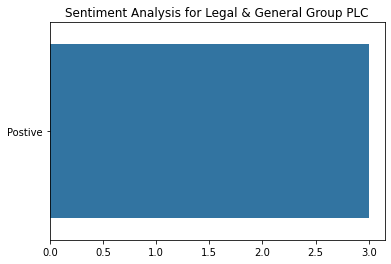

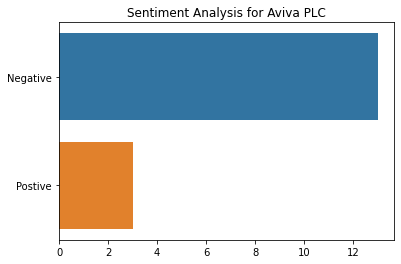

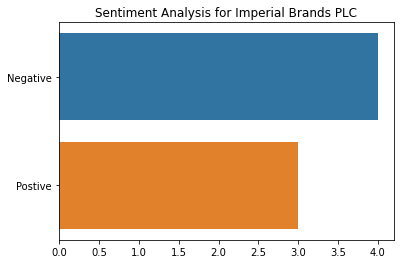

In [ ]:
for i,co in enumerate(companyNameList):
  co_sentiment_df = sentiments_df[sentiments_df['Company'] == co]
  co_sentiment =co_sentiment_df['Sentiment'].to_list()
  co_count = co_sentiment_df['Headlines'].to_list()
  sns.barplot(x=co_count, y = co_sentiment)
  plt.title("Sentiment Analysis for "+ co)
  plt.show()

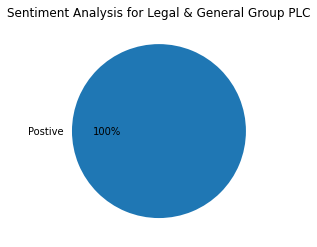

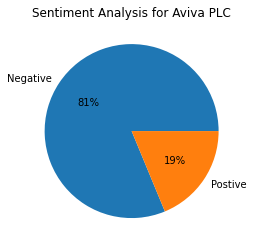

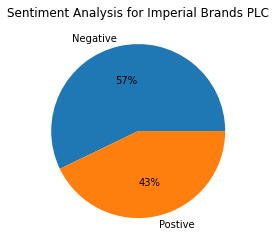

In [ ]:
import matplotlib.pyplot as plt

for i,co in enumerate(companyNameList):
  co_sentiment_df = sentiments_df[sentiments_df['Company'] == co]
  co_sentiment =co_sentiment_df['Sentiment'].to_list()
  co_count = co_sentiment_df['Headlines'].to_list()
  plt.pie(x = co_count, labels = co_sentiment, autopct='%.0f%%')
  plt.title("Sentiment Analysis for "+ co)
  plt.show()